In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel("VideoGames_Sales.xlsx")
df

,title,console,genre,publisher,developer,critic_score,total_sales(mil),na_sales(mil),jp_sales(mil),pal_sales(mil),other_sales(mil),release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             64016 non-null  object        
 1   console           64016 non-null  object        
 2   genre             64016 non-null  object        
 3   publisher         64016 non-null  object        
 4   developer         63999 non-null  object        
 5   critic_score      6678 non-null   float64       
 6   total_sales(mil)  18922 non-null  float64       
 7   na_sales(mil)     12637 non-null  float64       
 8   jp_sales(mil)     6726 non-null   float64       
 9   pal_sales(mil)    12824 non-null  float64       
 10  other_sales(mil)  15128 non-null  float64       
 11  release_date      56965 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 5.9+ MB


In [5]:
# Convert 'release_date' column to datetime. This is important for any future trend analysis with time series data.
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Handle any missing values for release_date if needed
missing_release = df['release_date'].isnull().sum()
print(f"Missing release_date entries: {missing_release}")

# For numerical columns, let's check if there are missing values
num_cols = ['critic_score', 'total_sales(mil)', 'na_sales(mil)', 'jp_sales(mil)', 'pal_sales(mil)', 'other_sales(mil)']
print(df[num_cols].isnull().sum())

# A simple strategy: fill missing numerical values with the median of each column
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Check missing values again
print("After cleaning:")
print(df[num_cols].isnull().sum())

# For categorical data, if required, you may fillmissing with a placeholder value (this is a common approach)
cat_cols = ['title', 'console', 'genre', 'publisher', 'developer']
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Confirm that the data is now clean
df.info()

Missing release_date entries: 7051
critic_score        57338
total_sales(mil)    45094
na_sales(mil)       51379
jp_sales(mil)       57290
pal_sales(mil)      51192
other_sales(mil)    48888
dtype: int64
After cleaning:
critic_score        0
total_sales(mil)    0
na_sales(mil)       0
jp_sales(mil)       0
pal_sales(mil)      0
other_sales(mil)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             64016 non-null  object        
 1   console           64016 non-null  object        
 2   genre             64016 non-null  object        
 3   publisher         64016 non-null  object        
 4   developer         64016 non-null  object        
 5   critic_score      64016 non-null  float64       
 6   total_sales(mil)  64016 non-null  float64       
 7   na_sales(mil)     64016 non-null  f

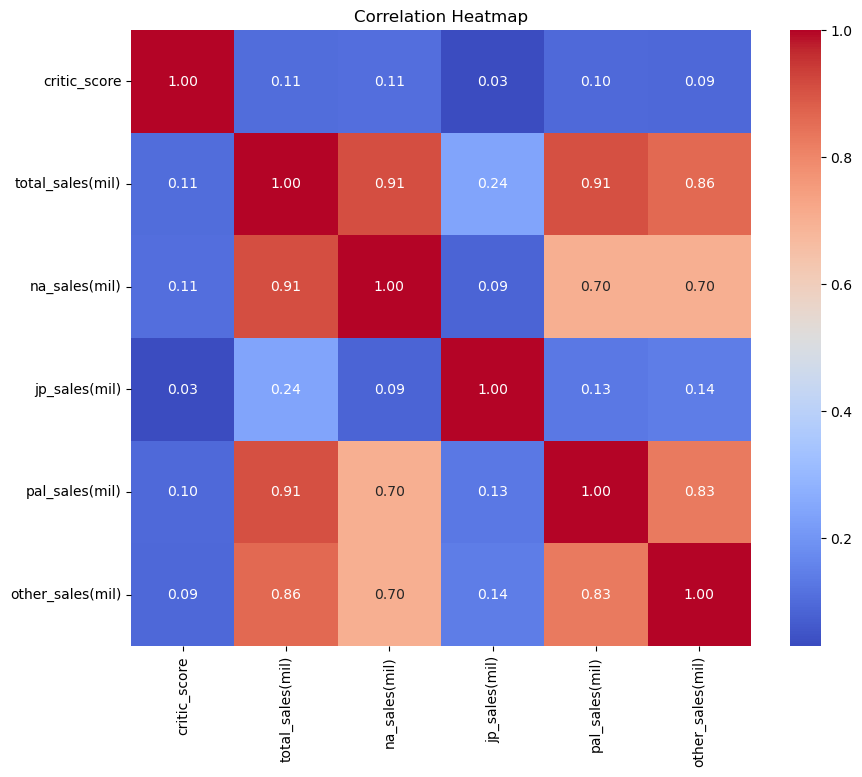

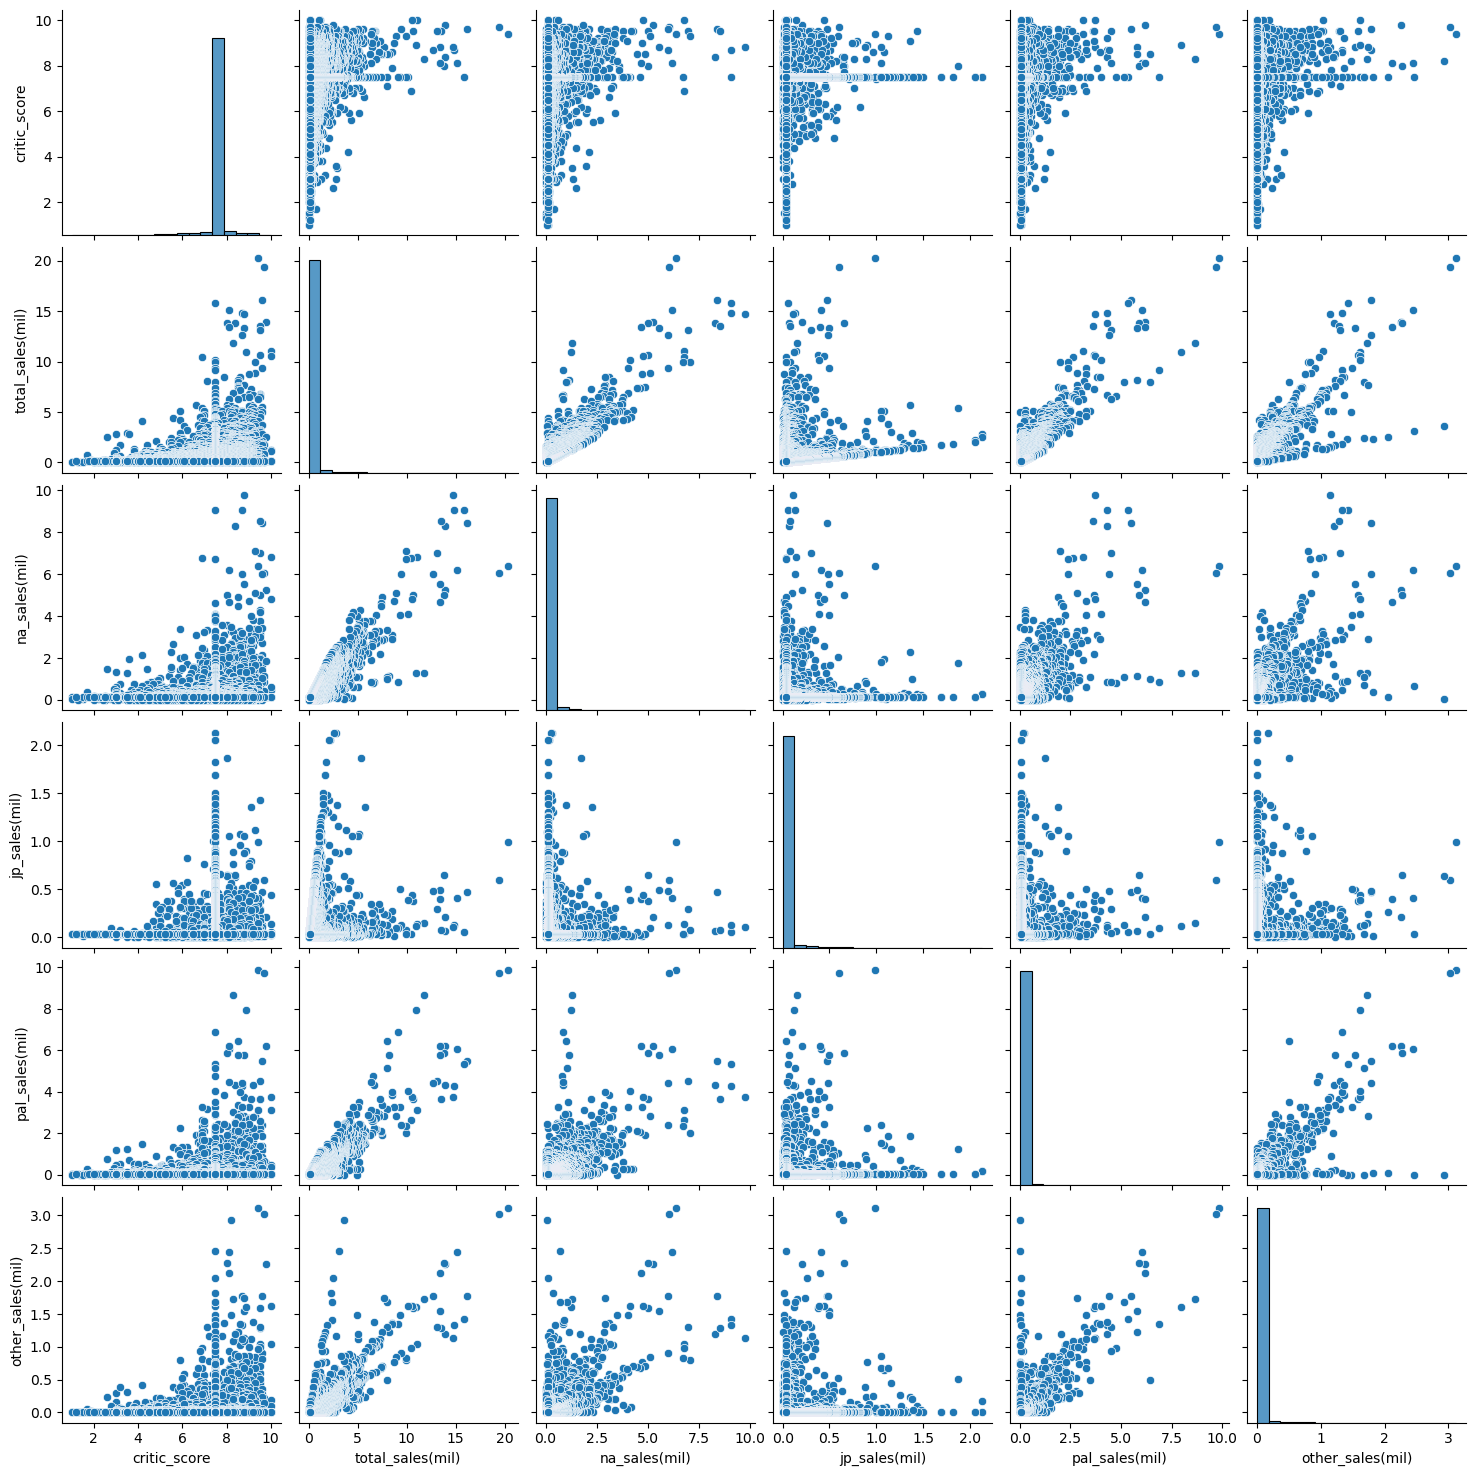

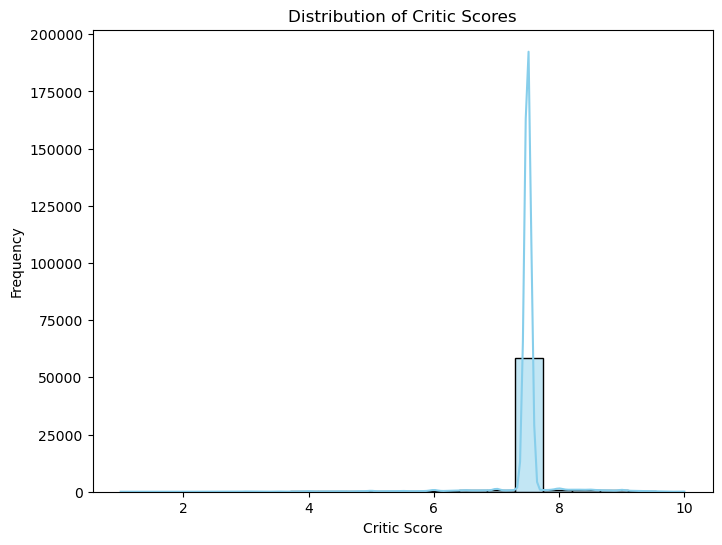

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24232\3141349071.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='console', order=df['console'].value_counts().index, palette='viridis')


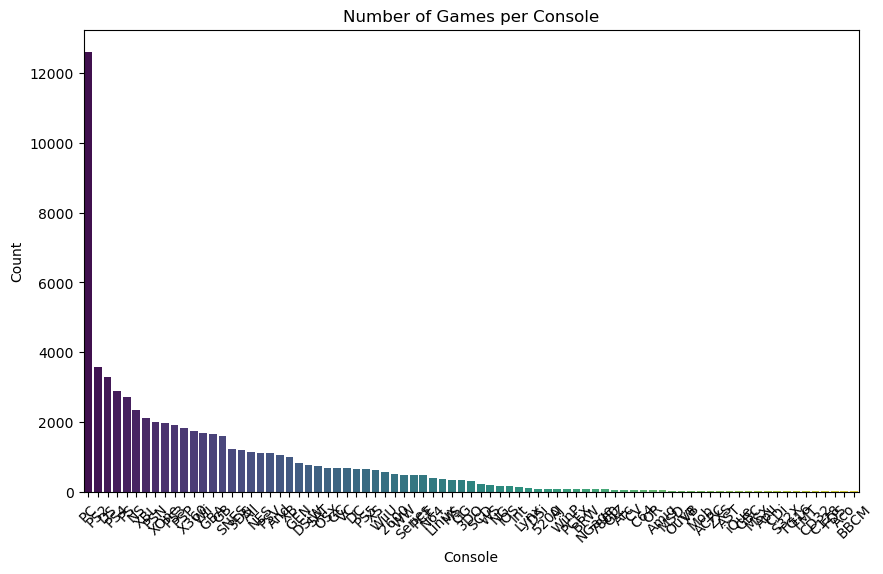

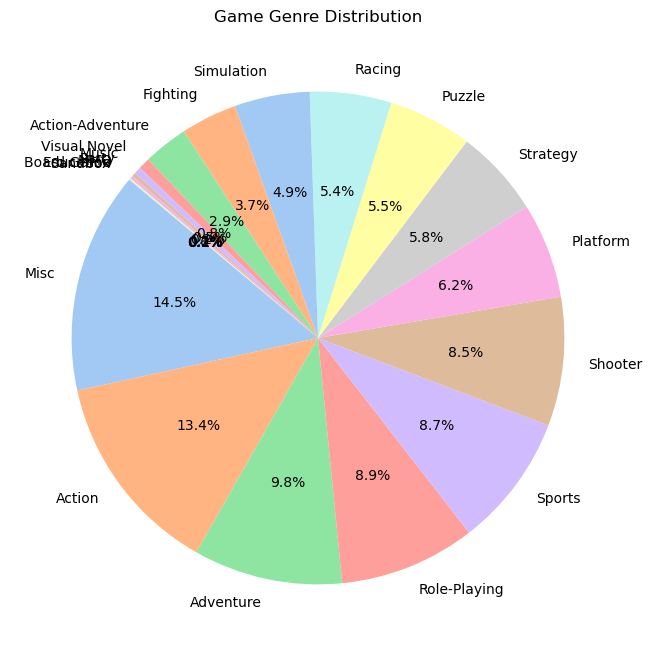

In [6]:
# Create a copy of the dataframe with only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# If there are 4 or more numeric columns, plot a correlation heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Not enough numeric columns for a correlation heatmap")

# Generate a pair plot for the numeric features to visually inspect potential relationships
sns.pairplot(numeric_df)
plt.show()

# Visualize the distribution of critic_score with a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['critic_score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Critic Scores')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')
plt.show()

# Bar plot for the number of games per console
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='console', order=df['console'].value_counts().index, palette='viridis')
plt.title('Number of Games per Console')
plt.xlabel('Console')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart style visualization for game genres (using countplot displayed as a pie chart alternative)
genre_counts = df['genre'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Game Genre Distribution')
plt.show()